<a href="https://colab.research.google.com/github/AlienX77-cmd/KU-Data-Mining/blob/main/HW_2_2_Kittipak_6310505688.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
# กิตติภัค วิบูลเสถียร 6310505688
# Kittipak Wibulsthien 6310505688
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# Upload files
from google.colab import files
uploaded = files.upload()

Saving hw#2_data.xlsx to hw#2_data (1).xlsx


In [38]:
# Loading the data from csv file to Pandas dataframe
patient_data = pd.read_excel('/content/hw#2_data.xlsx')

In [39]:
# Printing the first five rows of the dataset
patient_data.head()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Patient ID
0,2019-11-04,1183.22,10,20.17,ANCHOR,HMO,OUTPATIENT,08:35:45,09:17:54,09:29:46,C10001
1,2019-11-06,738.48,$-,15,ANCHOR,INSURANCE,OUTPATIENT,19:19:16,21:02:36,21:24:07,C10002
2,2019-11-02,660,$-,21.17,ANCHOR,HMO,OUTPATIENT,10:46:52,11:56:25,12:06:28,C10003
3,2019-11-06,600,$-,$-,ANCHOR,MEDICARE,OUTPATIENT,09:38:34,10:55:50,10:58:02,C10004
4,2019-11-01,591.6,$-,12,ANCHOR,INSURANCE,OUTPATIENT,11:16:21,12:06:49,12:06:54,C10005


In [40]:
# Size of matrix
patient_data.shape

(29998, 11)

In [41]:
# Checking for NULL value
patient_data.isnull().sum().sort_values(ascending = False)

Date                      0
 Medication Revenue       0
  Lab Cost                0
 Consultation Revenue     0
Doctor Type               0
Financial Class           0
Patient Type              0
Entry Time                0
Post-Consultation Time    0
Completion Time           0
Patient ID                0
dtype: int64

In [42]:
# Statistic Description
patient_data.describe()

<ipython-input-42-8431f9bc5b72>:2: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Patient ID
count,29998,29998,29998,29998,29998,29998,29998,29998,29998,29998,29998
unique,13,4280,200,241,3,5,1,20628,21356,21384,29998
top,2019-11-11 00:00:00,$-,$-,$-,ANCHOR,INSURANCE,OUTPATIENT,18:07:47,11:44:23,10:04:33,C10001
freq,3617,11936,28565,5576,21913,9931,29998,9,6,7,1
first,2019-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2019-11-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
patient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29998 entries, 0 to 29997
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    29998 non-null  datetime64[ns]
 1    Medication Revenue     29998 non-null  object        
 2     Lab Cost              29998 non-null  object        
 3    Consultation Revenue   29998 non-null  object        
 4   Doctor Type             29998 non-null  object        
 5   Financial Class         29998 non-null  object        
 6   Patient Type            29998 non-null  object        
 7   Entry Time              29998 non-null  object        
 8   Post-Consultation Time  29998 non-null  object        
 9   Completion Time         29998 non-null  object        
 10  Patient ID              29998 non-null  object        
dtypes: datetime64[ns](1), object(10)
memory usage: 2.5+ MB


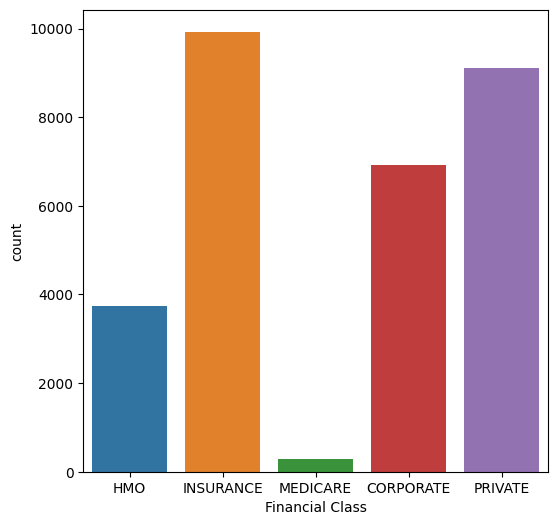

In [44]:
# Financial Class column
plt.figure(figsize=(6,6))
sns.countplot(x = "Financial Class", data = patient_data)
plt.show()

So, they are 4 class in Financial class
- 1. HMO
- 2. Insurance
- 3. Medicare
- 4. Corporate
- 5. Private


In [45]:
# Question 1) Does the financial type affect the waiting time? Explain with appropriate chart

In [46]:
patient_data['Financial Class'].value_counts()

INSURANCE    9931
PRIVATE      9121
CORPORATE    6915
HMO          3738
MEDICARE      293
Name: Financial Class, dtype: int64

- Since the dataset don't have the data for each patient's waiting time, so let's add the waiting timing by patient_data['Entry Time'] - patient_data['Completion Time']
- As it cant subtract two dates.time, so we need to change 'entry_time' , 'post_consultation_time' , 'completion_time' to_timedelta


In [47]:
patient_data['Completion Time'] = pd.to_timedelta(patient_data['Completion Time'].astype(str))
patient_data['Entry Time'] = pd.to_timedelta(patient_data['Entry Time'].astype(str))
patient_data['Post-Consultation Time'] = pd.to_timedelta(patient_data['Post-Consultation Time'].astype(str))

In [48]:
# Checking the types of the desired columns
patient_data.dtypes

Date                       datetime64[ns]
 Medication Revenue                object
  Lab Cost                         object
 Consultation Revenue              object
Doctor Type                        object
Financial Class                    object
Patient Type                       object
Entry Time                timedelta64[ns]
Post-Consultation Time    timedelta64[ns]
Completion Time           timedelta64[ns]
Patient ID                         object
dtype: object

In [49]:
patient_data.head()
# ignoring 0 days (no one is waiting for the whole day)

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Patient ID
0,2019-11-04,1183.22,10,20.17,ANCHOR,HMO,OUTPATIENT,0 days 08:35:45,0 days 09:17:54,0 days 09:29:46,C10001
1,2019-11-06,738.48,$-,15,ANCHOR,INSURANCE,OUTPATIENT,0 days 19:19:16,0 days 21:02:36,0 days 21:24:07,C10002
2,2019-11-02,660,$-,21.17,ANCHOR,HMO,OUTPATIENT,0 days 10:46:52,0 days 11:56:25,0 days 12:06:28,C10003
3,2019-11-06,600,$-,$-,ANCHOR,MEDICARE,OUTPATIENT,0 days 09:38:34,0 days 10:55:50,0 days 10:58:02,C10004
4,2019-11-01,591.6,$-,12,ANCHOR,INSURANCE,OUTPATIENT,0 days 11:16:21,0 days 12:06:49,0 days 12:06:54,C10005


In [50]:
# Adding new column 'waiting_time'
patient_data['Waiting Time'] = patient_data['Completion Time'] - patient_data['Entry Time']

# Calculate the waiting time in minute by using .dt.seconds / 60 and keep it in new column called "Waiting Time In Minute"
patient_data['Waiting Time In Minute'] = patient_data['Waiting Time'].dt.seconds / 60

# For rounding
patient_data['Waiting Time In Minute'] = patient_data['Waiting Time In Minute'].round(0)

# New column (Weekday) for extracting 'weekday' from 'date'
patient_data['Weekday'] = patient_data['Date'].dt.strftime('%A')

# New column (Hours) for extracting the 'Hours' from 'Entry Time'
patient_data['Hours'] = patient_data['Entry Time'].dt.components.hours

patient_data.head()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Patient ID,Waiting Time,Waiting Time In Minute,Weekday,Hours
0,2019-11-04,1183.22,10,20.17,ANCHOR,HMO,OUTPATIENT,0 days 08:35:45,0 days 09:17:54,0 days 09:29:46,C10001,0 days 00:54:01,54.0,Monday,8
1,2019-11-06,738.48,$-,15,ANCHOR,INSURANCE,OUTPATIENT,0 days 19:19:16,0 days 21:02:36,0 days 21:24:07,C10002,0 days 02:04:51,125.0,Wednesday,19
2,2019-11-02,660,$-,21.17,ANCHOR,HMO,OUTPATIENT,0 days 10:46:52,0 days 11:56:25,0 days 12:06:28,C10003,0 days 01:19:36,80.0,Saturday,10
3,2019-11-06,600,$-,$-,ANCHOR,MEDICARE,OUTPATIENT,0 days 09:38:34,0 days 10:55:50,0 days 10:58:02,C10004,0 days 01:19:28,79.0,Wednesday,9
4,2019-11-01,591.6,$-,12,ANCHOR,INSURANCE,OUTPATIENT,0 days 11:16:21,0 days 12:06:49,0 days 12:06:54,C10005,0 days 00:50:33,51.0,Friday,11


Create Groupby function

In [51]:
# Groupby as a function
def Grouping_data(column_name):

    '''
    Groupby column and return DataFrame
    Input: Column Name
    '''

    patient_df_tmp1 = patient_data.groupby(column_name)[['Waiting Time In Minute']].mean().round(0) #round(0) for zero value as one decimal
    patient_df_tmp2 = patient_data[column_name].value_counts() #For Concatination

    Pivot_F = pd.concat([patient_df_tmp1, patient_df_tmp2.rename('Number of Patient')], axis=1) #axis = 1 for column
    Pivot_F.reset_index(inplace = True) # reset index to default
    Pivot_F = Pivot_F.rename(columns={'index': column_name }) # renaming index column name to "column_name" value
    return Pivot_F

In [52]:
result1 =  Grouping_data('Financial Class')
result2 =  Grouping_data('Weekday')

# Checking
print(result1)
print(result2)

  Financial Class  Waiting Time In Minute  Number of Patient
0       CORPORATE                    46.0               6915
1             HMO                    46.0               3738
2       INSURANCE                    44.0               9931
3        MEDICARE                    58.0                293
4         PRIVATE                    40.0               9121
     Weekday  Waiting Time In Minute  Number of Patient
0     Friday                    42.0               4923
1     Monday                    49.0               6982
2   Saturday                    43.0               3010
3     Sunday                    33.0               2549
4   Thursday                    42.0               2673
5    Tuesday                    42.0               5690
6  Wednesday                    47.0               4171


Create a Plot (using Pie Chart)

In [53]:
import plotly.express as px
import plotly.offline as py
%matplotlib inline

In [54]:
# Financial Class Vs Waiting Time In Minute
plot = px.pie(result1, values = 'Waiting Time In Minute',
             names = 'Financial Class', hole = 0.7, width = 700, height = 700,
             template = 'plotly_white',
             hover_data = ['Waiting Time In Minute'],
             )

plot.update_traces(textposition = 'outside', textinfo = 'label+value')

plot.show()

Ans to Question 1:

From the pie chart, I can see that :
- 'CORPORATE' financial class waits for 46 minutes on average
- 'HMO' financial class waits for 46 minutes on average
- 'MEDICARE' financial class waits for 58 minutes on average
- 'PRIVATE' financial class waits for 40 minutes on average
- 'INSURANCE' financial class waits for 44 on average


In [55]:
# Question 2) What days of week are affected? Explain with appropriate chart

In [56]:
# Weekday Vs Waiting Time In Minute
plot = px.pie(result2, values = 'Number of Patient',
             names = 'Weekday', hole = 0.6, width = 600, height = 600,
             template = 'plotly_white',
             hover_data = ['Waiting Time In Minute'],
             )

plot.update_traces(textposition = 'outside', textinfo = 'label+value')

plot.show()

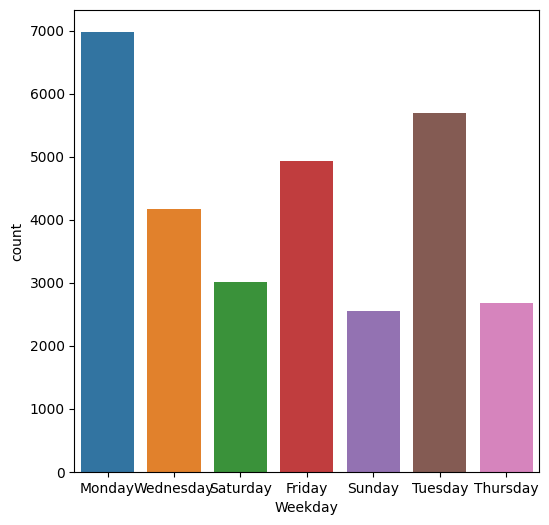

In [57]:
# Or using bar chart to see the visualization of the days of the week that are affected
plt.figure(figsize=(6,6))
sns.countplot(x = patient_data["Weekday"], data = patient_data)
plt.show()

Ans to Question 2:

Monday are the day that is affected because of the highest average waiting time.

In [58]:
# Question 3) Are waiting times associated with the busy periods (morning hours)? Explain with appropriate chart

In [59]:
# Pivot table Method
res = pd.pivot_table(patient_data, index='Hours', columns=['Weekday'] , aggfunc= 'mean').round(1) # Only 1 place for decimal
print(res['Waiting Time In Minute'])
res = res['Waiting Time In Minute']
res = res.fillna(0) # Deal with Missing Values
res = res[['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']] # For sorting the column (weekdays)
print(res)

Weekday  Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
Hours                                                                  
7           NaN     NaN      34.0     9.0      36.0     43.5       53.8
8          52.3    54.7      59.2    38.8      50.5     54.5       50.4
9          62.8    65.3      58.5    41.0      60.0     58.4       60.7
10         53.5    62.1      50.2    33.8      49.1     48.4       56.3
11         43.4    52.5      37.3    30.6      38.1     37.8       45.0
12         39.6    35.1      25.5    29.0      37.6     34.2       42.7
13         44.2    55.3      46.3    43.9      46.3     26.6       41.0
14         40.4    47.5      33.5    32.8      41.0     41.5       41.3
15         37.2    42.4      32.5    23.7      35.6     37.1       40.8
16         28.3    30.8      21.0    20.2      24.2     28.5       27.6
17         25.5    20.4      22.4    28.9      36.2     24.3       25.6
18         30.0    43.6      21.8    29.5      43.8     40.3    

<ipython-input-59-09b6f8fe9883>:2: FutureWarning:

pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.



In [60]:
figureQ3 = px.imshow(res,
                     labels = dict(x = "Weekday", y = "Hours",
                            color = "Waiting Time In Minutes") ,
                            aspect = "auto", color_continuous_scale = 'blues',
                            template = "plotly_white",
                            text_auto = True, width = 600, height = 600)
figureQ3.update_xaxes(side = "top")
figureQ3.show()

Ans to Question3:
Waiting times is associated with the busy periods (morning hours).
There are lots of patients during 8 to 10 AM of each day and the highest and peakest average waiting time are at 9 AM of every day.

In [61]:
# The End